# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


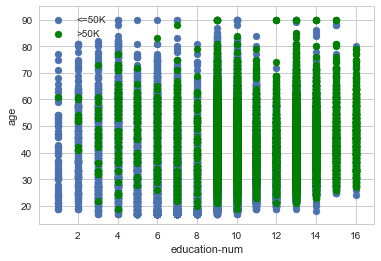

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

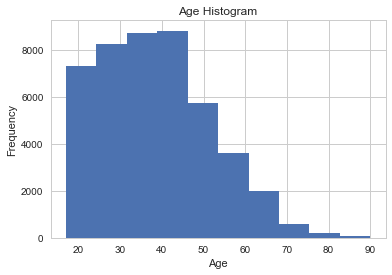

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= 'whitegrid', context='notebook')

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))
plt.scatter(data[data['income'] == '<=50K']['education-num'],data[data['income'] == '<=50K']['age'], label = '<=50K')
plt.scatter(data[data['income'] == '>50K']['education-num'],data[data['income'] == '>50K']['age'], color = 'green',label = '>50K')
plt.legend()
plt.xlabel('education-num')
plt.ylabel('age')
plt.show()

#cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
#sns.pairplot(data[data['income'] == '>50K'][cols], size = 2.5)
#plt.show()
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
data['age'].describe()






### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [3]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000

n_greater_50k = 0
for i in range(len(data)):
    if data['income'][i] == '>50K':
        n_greater_50k += 1
        
# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = 0
for i in range(len(data)):
    if data['income'][i] == '<=50K':
        n_at_most_50k += 1

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (float(n_greater_50k) / float(len(data))) * 100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

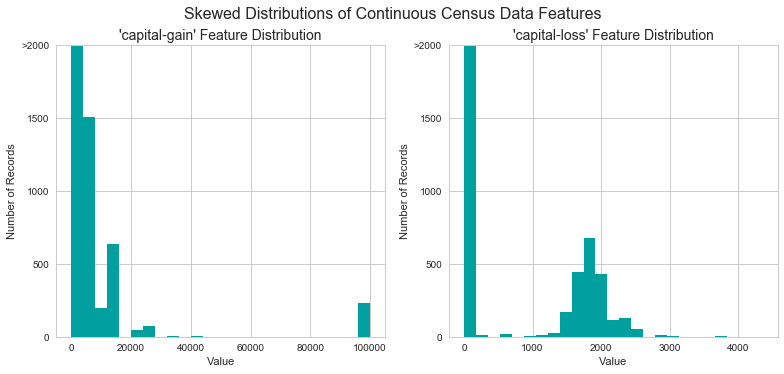

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)


# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

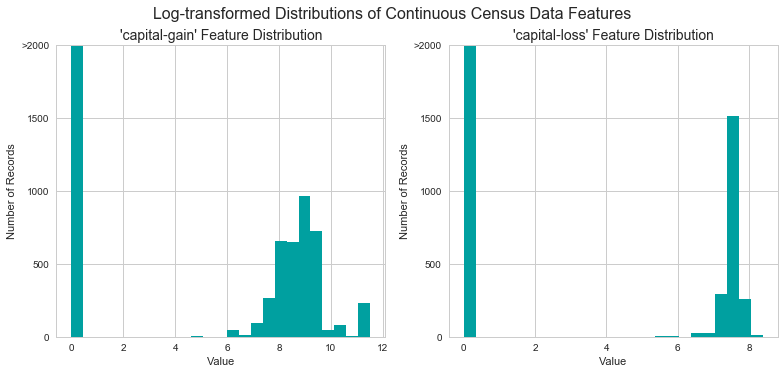

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [6]:

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))
features_log_minmax_transform.describe()





,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.295177,0.607897,0.064342,0.042423,0.407531
std,0.181067,0.170192,0.214240,0.190454,0.122526
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.600000,0.000000,0.000000,0.397959
75%,0.410959,0.800000,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [7]:
from sklearn import preprocessing
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
le = preprocessing.LabelEncoder()
le.fit(['<=50K', '>50K'])
income = le.transform(income_raw)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
#print encoded
#print(income)


103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [8]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


/Applications/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [9]:

TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = len(income) - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = float(TP + TN) / float(TP + TN + FP + FN)
recall = float(TP) / float(TP + FN)
precision = float(TP) / float(TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
fscore = float(1 + 0.5 ** 2) * (precision * recall) / float(((0.5 ** 2) * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)


Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: ** Support Vector Machines, Logistic Regression, Decision Trees.

1.Support Vector Machines:

A real world application of Support Vector Machines is predicting medication adherence. This can help health care practitioners better focus their attention on higher risk patients by classifying high and low risk patients.

Strengths: Support Vector Machines (SVM) are effective for classifying high dimensional data, meaning that it is effective for classifying data points with many features. SVM's are  versatile classifiers because of their capability to separate data that is linearly separable or initially non-linearly separable. The kernel trick can separate data that is not linearly separable in a lower dimension by mapping the data into a higher dimension and separating the classes with a hyper-plane. (Support Vector Machines, August 09, 2017)

Weaknesses: SVM's can be computationally complex, so the training and testing time can exceed other models by a large margin when the the training and testing samples increase in number. SVM's do not output the probability that a data point is in a particular class or not, it only classifies data points. (Support Vector Machines, August 09, 2017)

A Support Vector Machine is a good candidate for this problem for the following reasons. SVM's are versatile classifiers and can be tuned with differenct hyper-parameters to optimize the model. Consider the non-linear boundary that best separates >50K points and <=50K points when ploting 'education-num' on the x-axis and 'age' on the y-axis. The kernel trick could be used to add higher dimension values and then separate the n-dimensional points with a n - 1 dimensial hyperplane.

2.Logistic Regression: 

A real world application of Logistic Regression is loan default prediction. Features such as income, use of the loan, and interest rate are used to predict the target variable (default or no default). This application can be very useful to finance companies and investors. 

Strengths: Logistic Regression is able to classify data that is linearly separable very effectively. Logistic Regression also returns probabilities for being in one class or another, so not only is it a classifier model but it provides an estimate of how likely or not a data point is to belong to a particular class. A potential use of the probability outputs is to calculate expected values, which would be useful for making lending decisions. 

Weakness: If the data is not linearly separable it will likely do a poor job classifying the data. Another weakness is that if there is multicolinearity (correlated features) the interpretability of the model will be negatively affected.

What makes Logistic Regression a good candidate for this classification problem is that Logistic Regression is an intuitive model, the coefficients indicate the relationships between the features and target variable. It also looks as if there will be many linear relationships in the data. For example increasing values for education number will lead to increasing probabilities of making over $50,000, which will lead to a model with higher accuracy.

3.Decision Trees:

Some of the applications of Decision Trees include analyzing amino acid sequences, detection of physical particles, and star-galaxy classification. 

Strenths : Decision Trees are easy to interpret and visualize. A person can look at a decision tree and see how the algorithm classifies a given data point. Decision trees also require little data preparation and can interpret numerical and categorical data.(Decision Trees, August 09, 2017)

Weaknesses: Decision trees can overfit training data which can lead to a model that has high variance and generalizes poorly to the testing set. Decision Trees can be computationally complex, specifically when a tree represents an XOR function it becomes an exponential problem O(2^n).(Decision Trees, August 09, 2017)

What makes a Decision Tree classifier a good candidate for this problem is that it should be able to split the data into classes effectively by splitting the data on features that lead to gains in information. This means the purity of the data increases from the splits in the tree. For example a question in the tree could be the age of the person, and if the age is very young the person would be classified as <=50K. Observing the scatter plot that I generated in the beginning it looks like large gains in information can be made by splitting on age and education-num.


Decision Trees¶. (n.d.). Retrieved August 09, 2017, from http://scikit-learn.org/stable/modules/tree.html

Support Vector Machines¶. (n.d.). Retrieved August 09, 2017, from http://scikit-learn.org/stable/modules/svm.html

RASCHKA, S. M. (2017). PYTHON MACHINE LEARNING -. S.l.: PACKT PUBLISHING LIMITED.

(n.d.). Retrieved August 10, 2017, from http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html

(n.d.). Retrieved August 10, 2017, from https://classroom.udacity.com/nanodegrees/nd009/parts/daaa0245-f3cf-4b34-a0ba-8939c1079513/modules/a5f431db-f028-43ca-b3ce-3817936e7cb5/lessons/5414400946/concepts/31940190220923

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train[:300], 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
    print 'acc_test: ' + str(results['acc_test'])
    print 'f_test: ' + str(results['f_test'])
    print 'Precision: ' + str(precision_score(y_true= y_test, y_pred=predictions_test))
    print 'Recall: ' + str(recall_score(y_true= y_test, y_pred=predictions_test))
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

LogisticRegression trained on 361 samples.
acc_test: 0.818684355998
f_test: 0.628860190904
Precision: 0.668656716418
Recall: 0.507936507937
LogisticRegression trained on 3617 samples.
acc_test: 0.83858485351
f_test: 0.677506775068
Precision: 0.712250712251
Recall: 0.566893424036
LogisticRegression trained on 36177 samples.
acc_test: 0.841901603096
f_test: 0.683165228242
Precision: 0.709120345386
Recall: 0.595918367347


/Applications/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
acc_test: 0.756218905473
f_test: 0.0
Precision: 0.0
Recall: 0.0
SVC trained on 3617 samples.
acc_test: 0.832614704256
f_test: 0.671256454389
Precision: 0.758414360509
Recall: 0.459863945578
SVC trained on 36177 samples.
acc_test: 0.837147595357
f_test: 0.6744771707
Precision: 0.711316397229
Recall: 0.55873015873
DecisionTreeClassifier trained on 361 samples.
acc_test: 0.764731896075
f_test: 0.522729233158
Precision: 0.516403919898
Recall: 0.549659863946
DecisionTreeClassifier trained on 3617 samples.
acc_test: 0.804201216142
f_test: 0.598651685393
Precision: 0.59730941704
Recall: 0.604081632653
DecisionTreeClassifier trained on 36177 samples.
acc_test: 0.81824212272
f_test: 0.627240143369
Precision: 0.629322268326
Recall: 0.619047619048


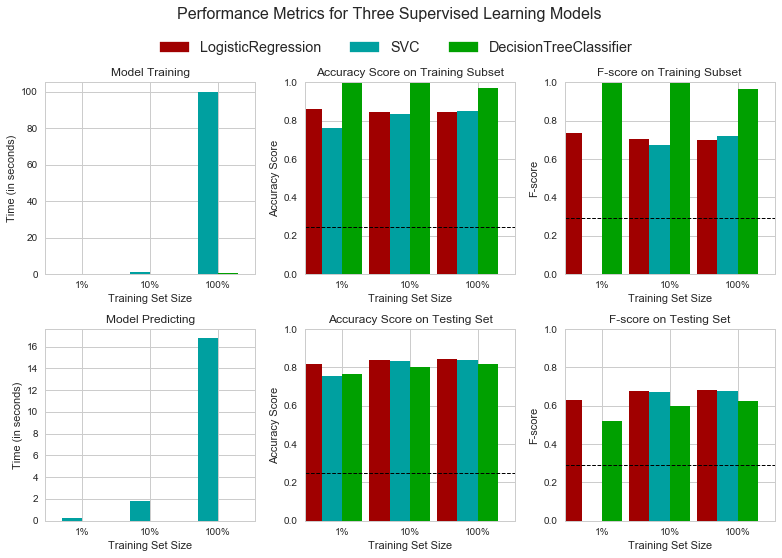

In [11]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state = 5)
clf_B = svm.SVC(random_state = 5)
clf_C = tree.DecisionTreeClassifier(random_state = 5)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(0.10 * len(y_train))
samples_1 = int(0.01 * len(y_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: ** The Logistic Regression model is the most appropriate for the task of predicting who makes over $50,000. The F-score of the Logistic Regression model is the highest of all the models on the test set when 100 percent of the training set is used in training. The time the Logistic Regression model takes to train and predict is significantly faster than the Support Vector Machine model. The accuracy of the Logistic Regression model on the test set when trained on 100 percent of the training data is 0.8419. This is significantly better than the accuracy score of the naive baseline model which has an accuracy score of 0.2478. The F-score of the Logistic Regression model is 0.6831, which is significantly better than the baseline model's F-score of 0.2917. Logistic Regression is suitable for this data because the values of the features influence the sigmoid function output to accurately model the target variable. Essentially a dot product is taken with the feature values and a weight vector (coefficients), the value of the dot product is then plugged into the sigmoid function to generate a probability. The function phi(z) = 1 / (1 + e^-z) ranges from zero to 1 and varies bases on the value of z, which as mentioned before is linear combination of weights and feature values.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 
Logistic Regression Model:

In summary a Logistic Regression model takes as inputs feature values and set of weights, and outputs a number in the range 0 to 1. This output corresponds to the probability that a given data point belongs to a given class. In the case of CharityML if the output of the model is >=0.5, the person is predicted to make >50K. In the following paragraphs more detail is provided regarding deriving the weights of the model as well as how the weights and features are used as inputs to the Logistic/Sigmoid function.


During training, the weights for the features are updated using the gradient descent method to minimize the cost/error function. This process leads to a set of weights/coefficients that are used in the Logistic Regression model. The following is a description of a cost function that is minimized to determine weights with no penalty for weight size. If the actual value of the target variable is 1 and the output of the Sigmoid function is goes toward 1 the cost approaches 0, the cost increases as the predicted value goes toward 0 when the actual value is 1. The same concept is applied when the actual value is 0. If the predicted value goes toward 0 when the target variable is 0 then the cost goes toward 0, and as the predicted value goes towards 1 the cost increases. Stated another way, as the predicted value diverges from the actual value the cost increases, the objective is to minimize the total cost of all data points in training. Minimizing the cost function corresponds to a set of weights, which will be used for the model. If there is a penalty for the size of weights that are used, the value of the weights can be affected. If there is a penalty for higher weights, weights that correspond to the minimum cost function will be lower. RASCHKA, S. M. (2017)


Once the weights are generated after minimizing the previously mentioned cost function, the Logistic Regression model can be used for prediction. In this example for predicting whether or not an individual makes more than $50,000 per year, there are two outcomes. If the person makes >50K the outcome is 1, otherwise it is 0. When using the model a linear equation of the weights and feature variables which can be called z, is the input of the Sigmoid function. For z values that are greater than or equal to zero the output of the Sigmoid function will be a value in [.5,1], and the corresponding data point will be classified as >50K. If the value of the Sigmoid function is less than 0.5 it is classified as 0 or <=50K. To give a more concrete illustration, if the coefficient for capital-gains is positive, higher capital gains values will increase the value of the output of the Sigmoid function. 


Below is a simplified example of a Logistic Regression model with three features (age, capital-gains, education-num). The B_i values are the hypothetical weights generated from training the model.

z = B_0 + B_1*(age) + B_2*(capital-gains) + B_3*(education-num)
(If the B_1, B_2, B_3, values are positive this means higher values for the features correspond to higher outputs of the Sigmoid function)

z is then the input of the Sigmoid function represented as phi(z):

phi(z) = 1 / (1 + e ** -z)

The sigmoid function takes on values between 0 and 1. The output of the Sigmoid function is the probability of a data point belonging to class 1 or >50K in this case. 

RASCHKA, S. M. (2017). PYTHON MACHINE LEARNING -. S.l.: PACKT PUBLISHING LIMITED.

(n.d.). Retrieved August 10, 2017, from https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46/modules/8241195f-41b0-4f06-b079-e3c1861ca0c4/lessons/6d6c5cc6-08eb-4e8b-8408-854e49584028/concepts/39134b91-993e-4da4-b647-8238d184e210


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [23]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the classifier
clf = LogisticRegression(random_state = 5)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C': [0.0001,0.001,1,.01,100,100000]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer)


# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8419
F-score on testing data: 0.6832

Optimized Model
------
Final accuracy score on the testing data: 0.8419
Final F-score on the testing data: 0.6832


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |          0.2478           |         0.8419          |         0.8419        |
| F-score        |             0.2917        |            0.6832       |   0.6832       |


**Answer: ** The optimized model has an accuracy score of 0.8419 and a F-score of 0.6832. The optimized model did not have higher accuracy and F-score measures than the unoptomized model. The optimized and unoptomized model have significantly better scores than the naive predictor. The naive predictor has an accuracy score and F-score of 0.2478 and 0.2917 respectively. Tuning the model with different C values did not improve the model. The default value for C is 1 for the Logistic Regression model, smaller C values increase the regularization of the model to prevent over fitting and larger values of C can result in a more complex model.


----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

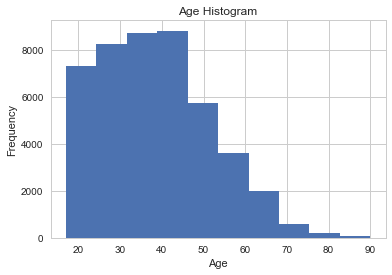

In [40]:
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
data['age'].describe()

**Answer:** 
1. Age: From looking at the data and using common sense, a persons prime earning years are probably in the range of 30 to 60 years old. The reason being is that people younger than 30 have less work experience on averge and less money invested that will pay dividends and interest. In a previous scatter plot it is clear that very old people and very young people are less likely to make > $50K. 

 2. education num: There are statistics available showing that more advanced degrees are positively correlated with median income. This usually means more time in school, so it would be expected that higher education-num values will imply a higher proability the person has an income > $50K.
 
 3. Capital Gains: If someone has capital gains it indicates that they have money invested. If a person invests money it usually indicates that they have a salary higher than their expenses, which could indicate a higher income. If a person has capital gains it is more likely that they have dividend and interest income, which will lead to a higher total income.
 
 4 Work Class: The people in the data set are in the following Work Class categeories; Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. It makes sense that people that are in the category "Never-Worked" will have a lower probability of making a high salary. People in the private sector are more likely than other groups to make more money because of the opportunity for business/stock equity ownership, and bonuses.
 
 5. Hours per week: Since most people are paid for their time on the job it makes sense that hours worked will affect their earnings. The hourly earnings across different groups varies dramatically, and this could affect how good of an indicator hours per week is with making a high salary. However professions that have high salaries can also have work weeks that are well above average in hours, such as doctors and lawyers. So it is possible that high values for hours per week could imply a high salary. 

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

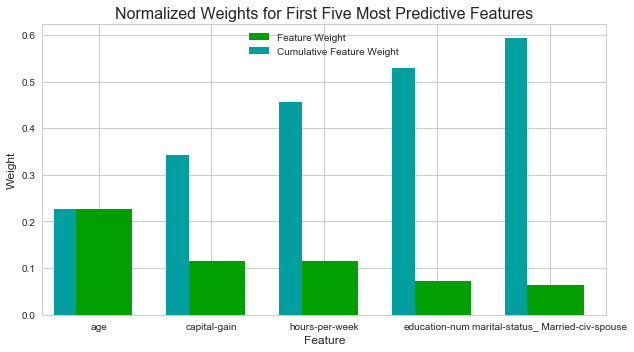

In [30]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier(n_estimators=10)
model = model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:** I correctly estimated four of the five most important features for the previous question. I correctly said Age, hours-per-week, capital-gains and education-num would be strong indicators of whether an individual makes over $50,000 or not. I did not mention the relationship feature, this feature is interesting in that having a husband is predictive in how much money a person makes. The visualization confirms common sense reasoning, seeing the ranks of the features really informs on the structure of the data. 


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [34]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)
print X_train.columns.values[(np.argsort(importances)[::-1])[:5]]
print 'weights: ' + str(clf.coef_)
print 'intercept: ' + str(clf.intercept_)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

['age' 'capital-gain' 'hours-per-week' 'education-num'
 'marital-status_ Married-civ-spouse']
weights: [[ 2.0450722   2.31673434  2.83347766  5.53778395  2.38511688]]
intercept: [-8.1969351]
Final Model trained on full data
------
Accuracy on testing data: 0.8419
F-score on testing data: 0.6832

Final Model trained on reduced data
------
Accuracy on testing data: 0.8266
F-score on testing data: 0.6481


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:** The accuracy and F-score of the final model are lower than the model trained with all features, although the scores are almost the same. It appears that the extra features do add slightly to the models capability for accurate predictions. Since the Logistic Regression model did not take long to train with the full data set and all features I would say that reducing the features is not helpful in regard to saving time. Although since the accuracy is only 2 percent less with the reduced data model it may be wise to follow Occam's razor and choose a simpler model that does nearly the same job. However, if the dataset became larger it could be useful to reduce the features to boost the speed of training and testing. For the Support Vector Machine, reducing the features would most likely make a reduction in training and testing time. With this knowledge if I see that a SVM is achieving good results but taking a long time to train and test, I would definately reduce the features that are less important to make gains in speed. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.